# Clustering


In [54]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import numpy as np
import scipy.cluster.hierarchy as hier
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import cluster, datasets, mixture

In [74]:
df = pd.read_csv('data/x_train.csv')

In [75]:
# a co jak zmniejszymy liczbe wymiarow?
pca = PCA(n_components=3)
pca.fit(df)
PCA_ds = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,22152.0,-1.031249e-17,0.529433,-0.807630,-0.603912,0.156810,0.314532,0.858353
col2,22152.0,3.804489e-17,0.431278,-0.867951,-0.434058,0.026710,0.352952,0.999304
col3,22152.0,2.846632e-17,0.367740,-0.529384,-0.204275,-0.122966,-0.040295,1.053433


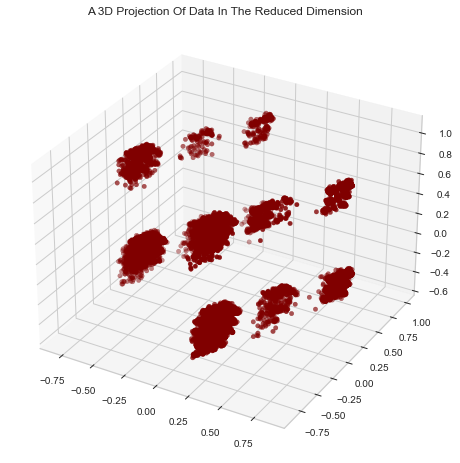

In [38]:

x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

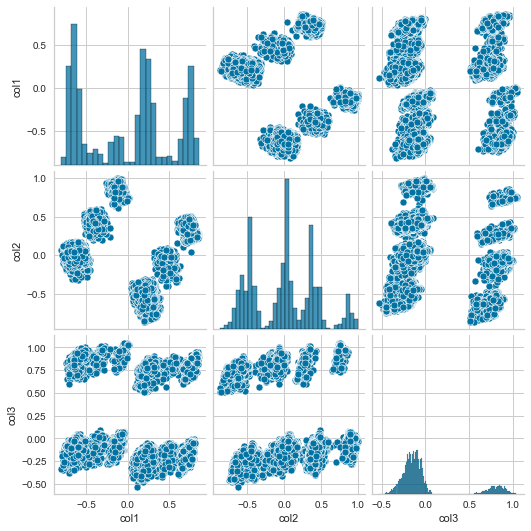

In [39]:
# wykresy zmiennych
df=PCA_ds
sns.pairplot(df)


# SZUKAMY LICZBY KLASTRÓW : D

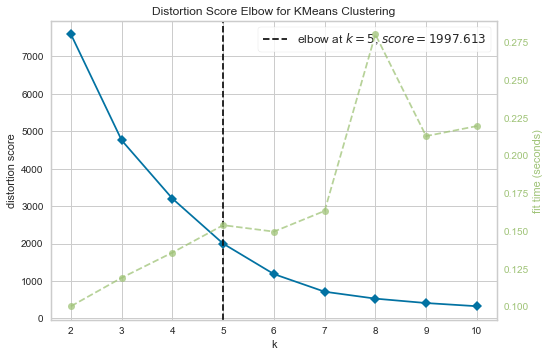

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

Metodą łokcia wychodzi 5

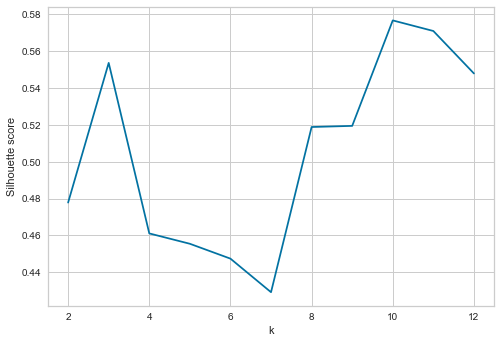

In [42]:
#Kmedoids
from sklearn.metrics import silhouette_score


def count_clustering_scores(X, cluster_num, model, score_fun):
   
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores


cluster_num_seq = range(2, 13)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, KMedoids, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Najlepiej dla 10

In [15]:
import sklearn_extra
from sklearn_extra.cluster import KMedoids

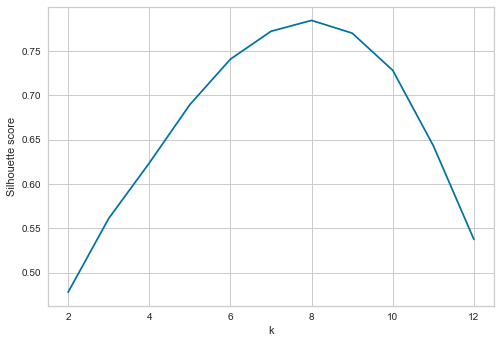

In [43]:
#Kmeans
def count_clustering_scores(X, cluster_num, model, score_fun):
   
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores


cluster_num_seq = range(2, 13)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

tutaj najlepiej wypada 8

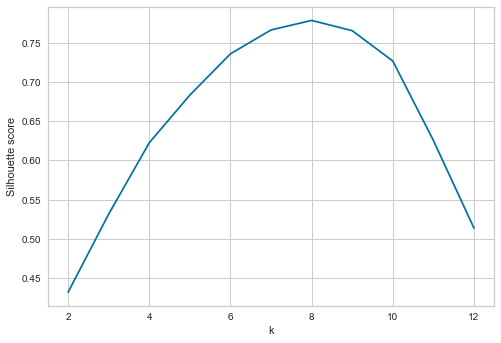

In [44]:
#hierarchiczna

from sklearn.cluster import AgglomerativeClustering

def count_clustering_scores(X, cluster_num, model, score_fun):
   
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores


cluster_num_seq = range(2, 13)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, AgglomerativeClustering, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()




Ogólnie to nie wiem czy mona tak sboe podmieniać te algorytmy (chodzi mi o 5 linijke od dolu w a=kazdym sposobie)
Wszedzie w internecie bylo KMeans
tutaj najlepiej wypada 8

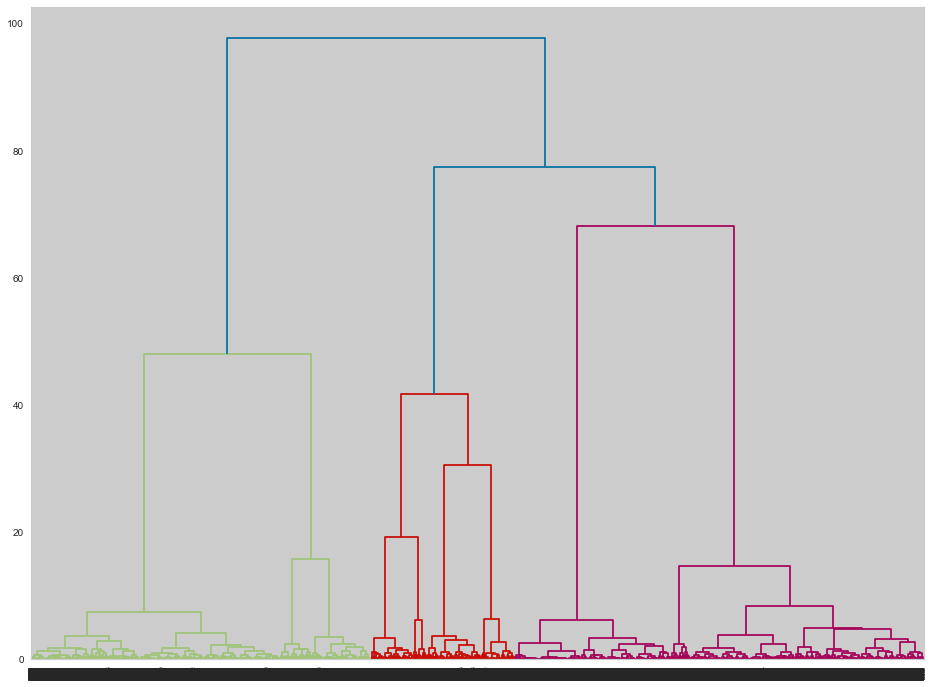

In [47]:
plt.figure(figsize=(16,12))
heirachical_graph=hier.dendrogram(hier.linkage(df, method='ward')) 

In [ ]:

# ---notatki---

# Dzięki temu możemy nie podawać jawnie liczby klastrów, a powiedzieć na przykład:
# Interesują nas klastry, w których odległość między punktami będzie nie większa niż 4.
# A wtedy możemy zrobić tak:
# model = AgglomerativeClustering(n_clusters=None, linkage='average', distance_threshold=4)
# y = model.fit_predict(X)
# plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis')
# plt.show()
# -----

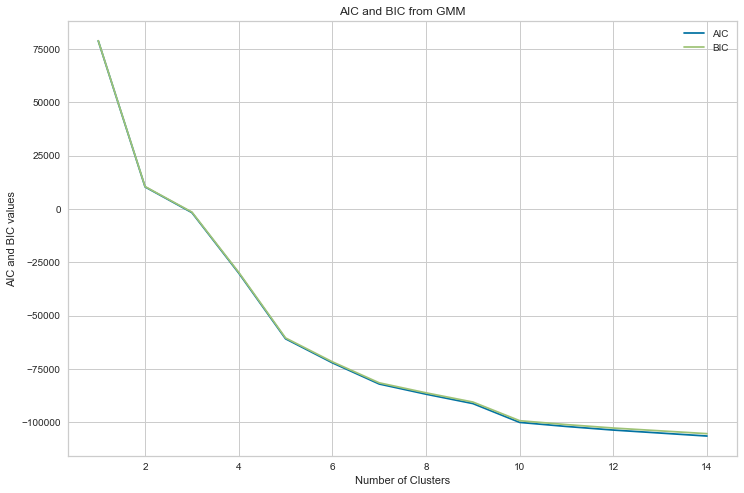

In [48]:
#Using AIC And BIC From GMMs
aic_score = {} 
bic_score = {}
# Loop through different number of clusters
for i in range(1,15): 
  # Create Gaussian Mixture Model
  gmm = GaussianMixture(n_components=i, random_state=0).fit(df)
  # Get AIC score for the model
  aic_score[i] = gmm.aic(df)
  # Get BIC score for the model
  bic_score[i] = gmm.bic(df)
# Visualization
plt.figure(figsize=(12,8))
plt.plot(list(aic_score.keys()),list(aic_score.values()), label='AIC')
plt.plot(list(bic_score.keys()),list(bic_score.values()), label='BIC')
plt.legend(loc='best')
plt.title('AIC and BIC from GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC and BIC values')
plt.show()

# według tego im wiecej klastrow tym najlepszy wynik xd

/var/folders/l0/bl24r5cx6p59d53494h7c33c0000gp/T/ipykernel_6959/2357810181.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
/var/folders/l0/bl24r5cx6p59d53494h7c33c0000gp/T/ipykernel_6959/2357810181.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
/var/folders/l0/bl24r5cx6p59d53494h7c33c0000gp/T/ipykernel_6959/2357810181.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
/var/folders/l0/bl24r5cx6p59d53494h7c33c0000gp/T/ipykernel_6959/2357810181.py:38: FutureWarning: The frame.appen

Optimal k is:  18


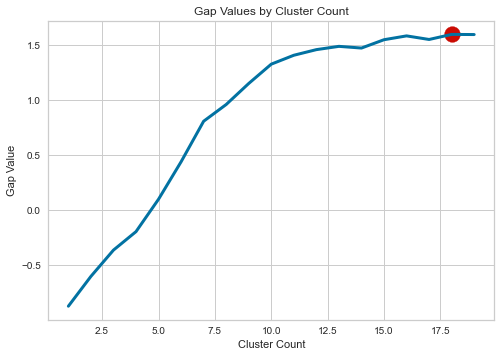

In [51]:
#Gap Statistics
def optimalK(data, nrefs=3, maxClusters=20):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

k, gapdf = optimalK(df, nrefs=3, maxClusters=20)
print('Optimal k is: ', k)
# Visualization
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

Ogolnie zwraca 10, "The function output the optimal number of cluster based on the number of clusters with the largest gap value" 
ale to tez sie odczytuje metoda lokcia, u nas to to troche ciezko go znalezc, ja bym powiedziala ze 10

# łatwo nie jest ogólnie ale raczej ta 10 sie powtarza i patrzac na wykres rzeczywiscie jest tych 10 grupek

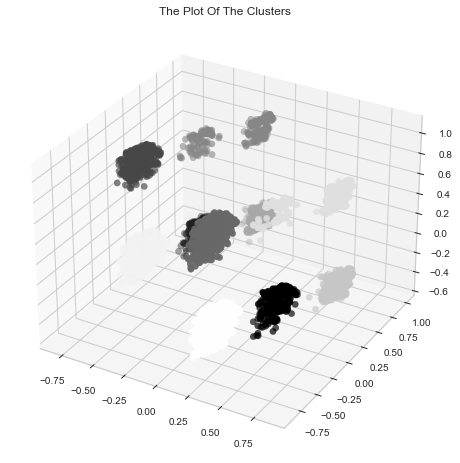

In [76]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(10)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o' )
ax.set_title("The Plot Of The Clusters")
plt.show()

^średnio to sobie radzi, trzeba próbować innymi